In [4]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
from IPython.display import HTML, display
from tabulate import tabulate
requests.packages.urllib3.disable_warnings()

# Vehicle Routing Problem

In [5]:
### Insert the name of the file 
file = 'E045-04f.dat'
### Header for requests
headers = {'Content-type': 'text/plain'}

### Resolve the instance with no refinement algorithms

#### Request the Java version

In [51]:
url = 'https://192.168.30.151:31001/api/v1/web/guest/default/vrpJava?vns=false'

In [52]:
r = requests.post(url, data=open(file,'rb'), headers=headers, verify=False)

#### Request the Javascript version

In [51]:
url = 'https://192.168.30.151:31001/api/v1/web/guest/default/vrpJS?vns=false'

In [54]:
r = requests.post(url, data=open(file,'rb'), headers=headers, verify=False)

#### Request the Spring version

In [6]:
url = 'http://localhost:8005/api/solveVRP?vns=false'

In [7]:
r = requests.post(url, data=open(file,'rb'), headers=headers, verify=False)

#### Solution Informations

In [8]:
number_vehicles = len(r.json()["solution"])
vehicles = []
for i in range(number_vehicles):
    vehicles += r.json()["solution"][i]["coords"]
df = pd.DataFrame(vehicles)
total_cost = 0
print("Solution Informations:")
for i in range(number_vehicles):
    print("vehicle", i+1, "cost:", r.json()["solution"][i]['cost'],"load:",r.json()["solution"][i]['load'])
    total_cost += r.json()["solution"][i]['cost']
print("-----------------------------------")
print("Total cost: ", r.json()["cost"])
print("-----------------------------------")
print("check cost: ", total_cost)

Solution Informations:
vehicle 1 cost: 129.0 load: 1928
vehicle 2 cost: 132.0 load: 1575
vehicle 3 cost: 113.0 load: 2004
vehicle 4 cost: 427.0 load: 1713
-----------------------------------
Total cost:  801.0
-----------------------------------
check cost:  801.0


### Plot the solution found

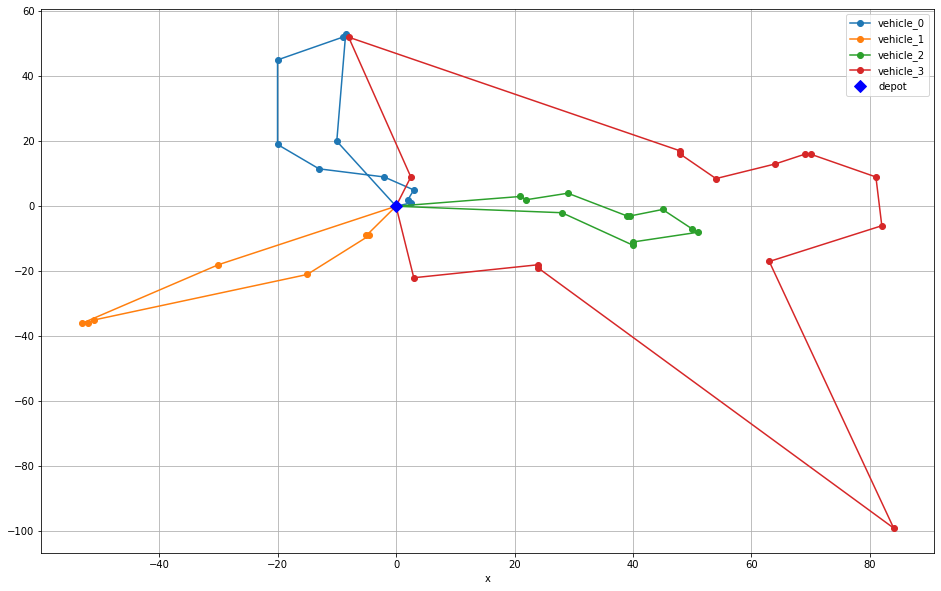

In [9]:
fig, ax = plt.subplots()
depot = pd.DataFrame({'x': [r.json()["solution"][0]["coords"][0]['x']], 'y': [r.json()["solution"][0]["coords"][0]['y']]})
for label, grp in df.groupby('id'):
    grp.plot(x = 'x', y = 'y', ax = ax, label = label, marker='o', figsize=(16, 10))
depot.plot(x = 'x', y = 'y', ax = ax, style='bx', label='depot', marker='D', markersize=8)
plt.grid()

### Resolve the instance with the Variable Neighbour Search heuristic

#### Parameters
- vns: true
- k_opt: How much random cities to swap at each iteration of the algorithm
- n_iter: Number of iterations

In [10]:
k_opt = 3
n_iter = 100

#### Request the Java version

In [ ]:
url = 'https://192.168.30.151:31001/api/v1/web/guest/default/vrpJava?vns=true&k_opt=' + str(k_opt) + '&n_iter=' + str(n_iter)

In [28]:
r = requests.post(url, data=open(file,'rb'), headers=headers, verify=False)

#### Request the Javascript version

In [ ]:
url = 'https://192.168.30.151:31001/api/v1/web/guest/default/vrpJS?vns=true&k_opt=' + str(k_opt) + '&n_iter=' + str(n_iter)

In [42]:
r = requests.post(url, data=open(file,'rb'), headers=headers, verify=False)

#### Request the Spring version

In [12]:
url = 'http://localhost:8005/api/solveVRP?vns=true&k_opt=' + str(k_opt) + '&n_iter=' + str(n_iter)

In [30]:
r = requests.post(url, data=open(file,'rb'), headers=headers, verify=False)

#### Solution Informations

In [31]:
number_vehicles = len(r.json()["solution"])
vehicles = []
for i in range(number_vehicles):
    vehicles += r.json()["solution"][i]["coords"]
df = pd.DataFrame(vehicles)
total_cost = 0
print("Solution Informations:")
for i in range(number_vehicles):
    print("vehicle", i+1, "cost:", r.json()["solution"][i]['cost'],"load:",r.json()["solution"][i]['load'])
    total_cost += r.json()["solution"][i]['cost']
print("-----------------------------------")
print("Total cost: ", r.json()["cost"])
print("-----------------------------------")
print("check cost: ", total_cost)

Solution Informations:
vehicle 1 cost: 25.0 load: 1612
vehicle 2 cost: 148.0 load: 2010
vehicle 3 cost: 113.0 load: 2004
vehicle 4 cost: 438.0 load: 1594
-----------------------------------
Total cost:  724.0
-----------------------------------
check cost:  724.0


### Plot the solution found

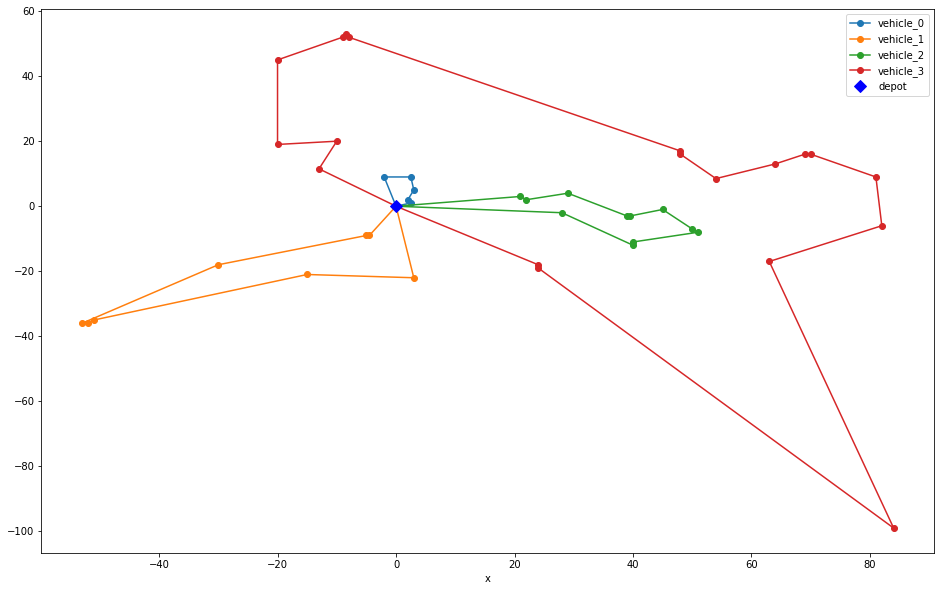

In [32]:
fig, ax = plt.subplots()
depot = pd.DataFrame({'x': [r.json()["solution"][0]["coords"][0]['x']], 'y': [r.json()["solution"][0]["coords"][0]['y']]})
for label, grp in df.groupby('id'):
    grp.plot(x = 'x', y = 'y', ax = ax, label = label, marker='o', figsize=(16, 10))
depot.plot(x = 'x', y = 'y', ax = ax, style='bx', label='depot', marker='D', markersize=8)